In [11]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df= pd.read_csv(r"C:\Users\shamn\OneDrive\Desktop\Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blancks with 0 as terned is 0 and no tatal charges are recode 

In [26]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
df.isnull().sum().sum()

0

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
df.duplicated().sum()

0

# Converted 0 and 1 values of senior citizen to yes/ no to make it easier to understand

In [34]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)       

In [36]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


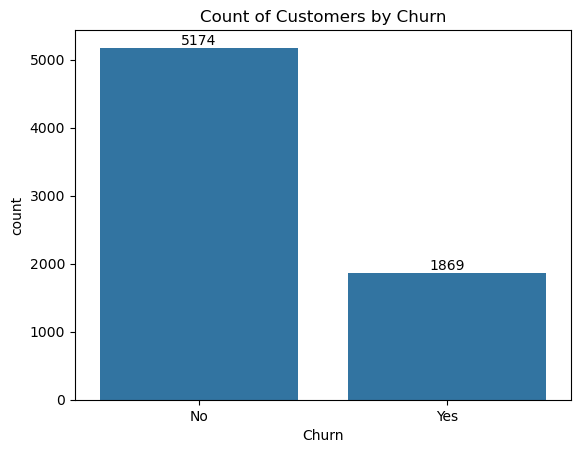

In [53]:
ax = sns. countplot(x='Churn', data = df)

ax. bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

In [48]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


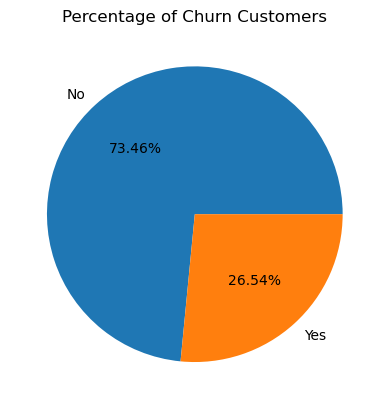

In [54]:
plt.pie(gb['Churn'],labels=gb.index, autopct ="%1.2f%%")
plt.title("Percentage of Churn Customers")
plt.show()

# frome the given pie chart we can conclude that 26.54% of our customers have chrn out

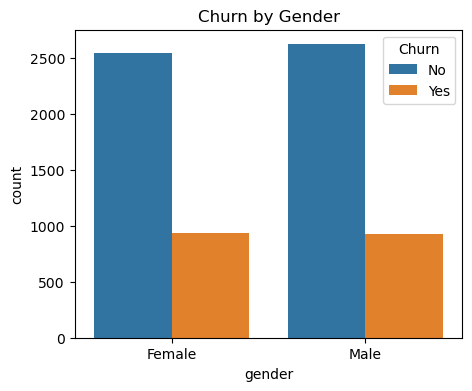

In [60]:
plt.figure(figsize=(5,4))
sns.countplot(x ="gender", data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

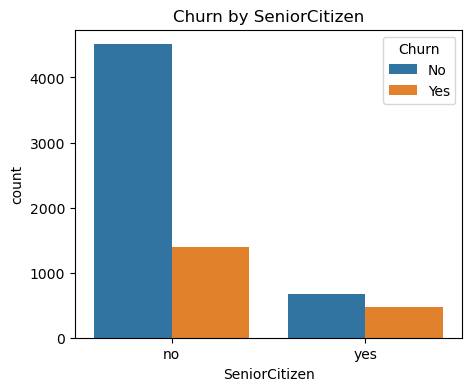

In [61]:
plt.figure(figsize=(5,4))
sns.countplot(x ="SeniorCitizen", data=df,hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

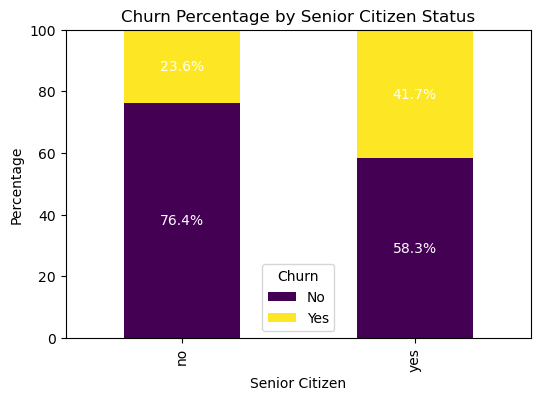

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
# Compute counts and percentages
counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot stacked bar chart
ax = percentages.plot(kind="bar", stacked=True, figsize=(6,4), colormap="viridis")

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white")

# Formatting
plt.title("Churn Percentage by Senior Citizen Status")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn")
plt.ylim(0, 100)  # Ensure it represents 100%
plt.show()

# people who have used our long term use stayed

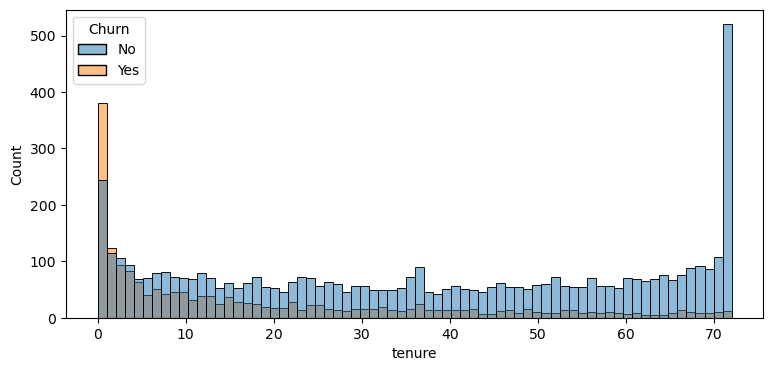

In [65]:
plt.figure(figsize=(9,4))
sns. histplot(x= "tenure", data= df, bins= 70,hue ="Churn")

plt.show()

# people based on contactas

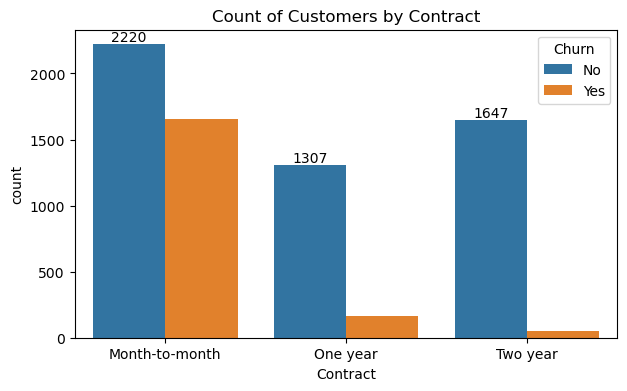

In [89]:
plt.figure(figsize=(7,4))
ax=sns.countplot(x ="Contract", data=df,hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

# Phone Service & Multiple Lines:

Customers with phone service are more likely to stay, but a notable percentage still churn.
Having multiple lines does not significantly affect churn.
Internet Service Type:

Fiber optic users have higher churn rates compared to DSL users.
Customers without internet service have the lowest churn, possibly because they rely on phone services instead.
Security & Backup Services (Online Security, Online Backup, Device Protection):

Customers who do not have security or backup services are more likely to churn.
Offering these services may help retain customers.
Tech Support:

Lack of tech support correlates with higher churn rates.
Customers with tech support are more likely to stay.
Streaming Services (Streaming TV & Streaming Movies):

Interestingly, customers who do not have streaming services show higher retention.
This suggests that streaming services alone are not a strong factor in churn.


In [74]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

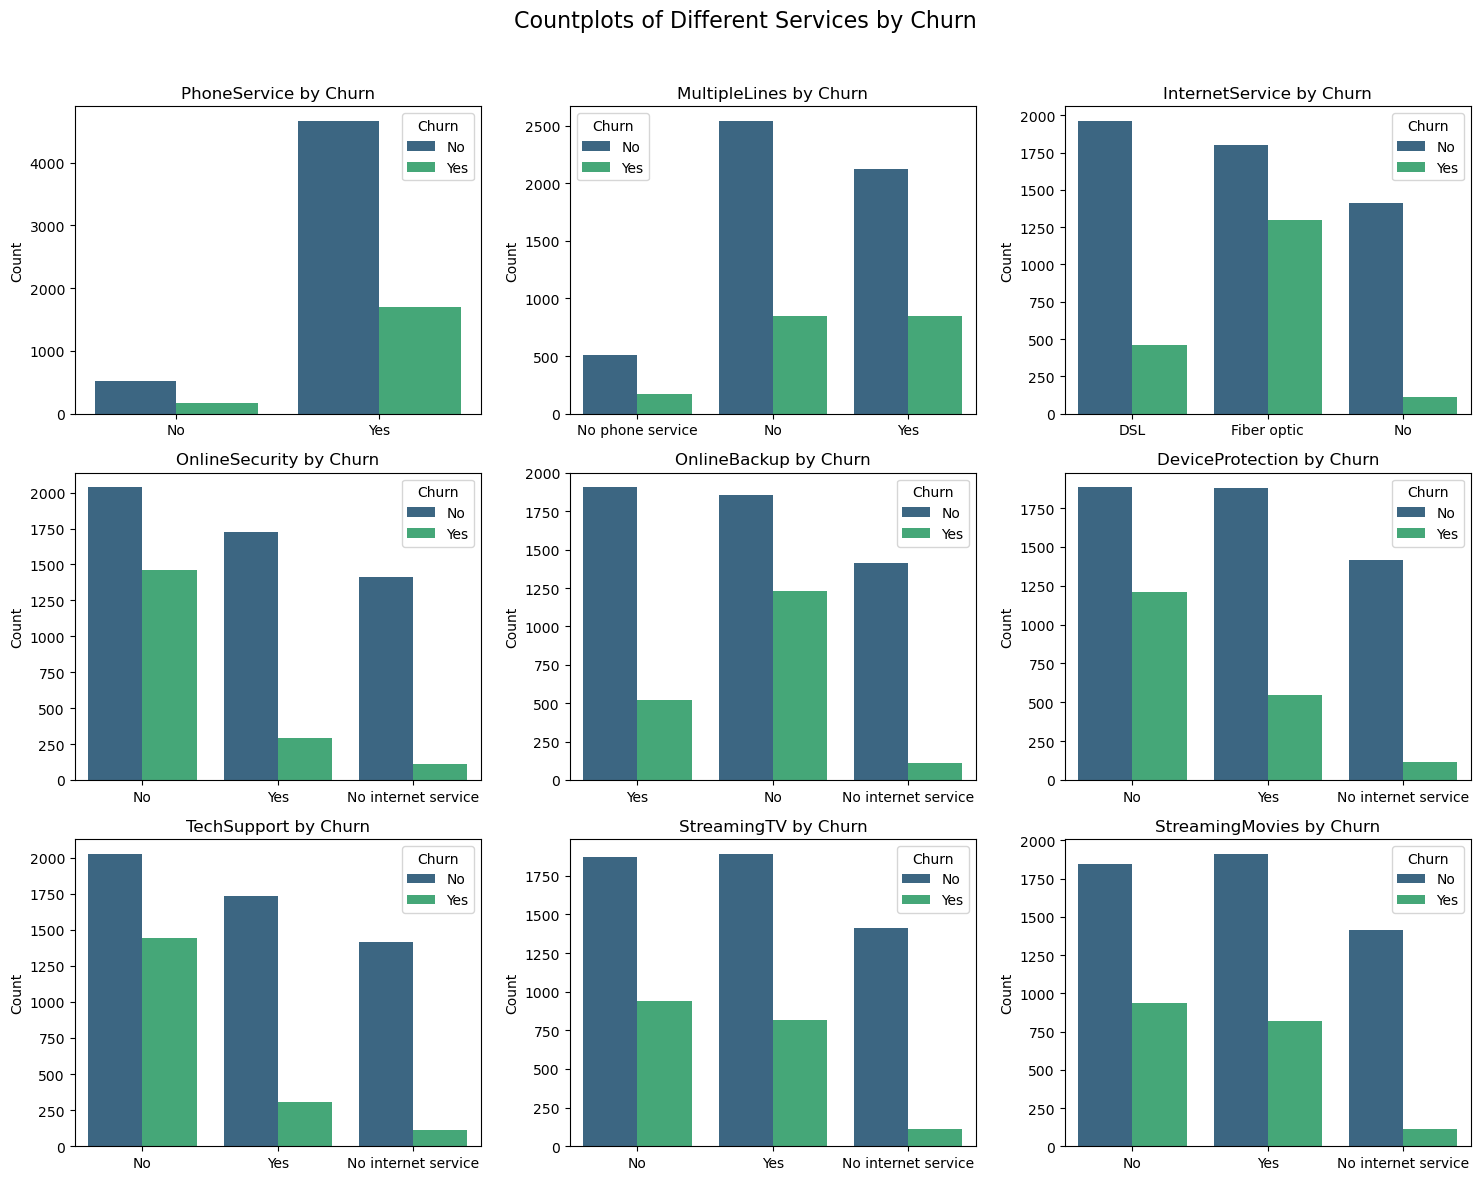

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplots (3 rows, 3 cols)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Countplots of Different Services by Churn", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create countplots
for i, col in enumerate(cols):
    sns.countplot(x=df[col], hue=df["Churn"], ax=axes[i], palette="viridis")
    axes[i].set_title(f"{col} by Churn")
    axes[i].set_xlabel("")  # Remove x-label to avoid clutter
    axes[i].set_ylabel("Count")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # To fit suptitle
plt.show()


# costomers is likely to churn when he is using  eleteronic and pymentmethod

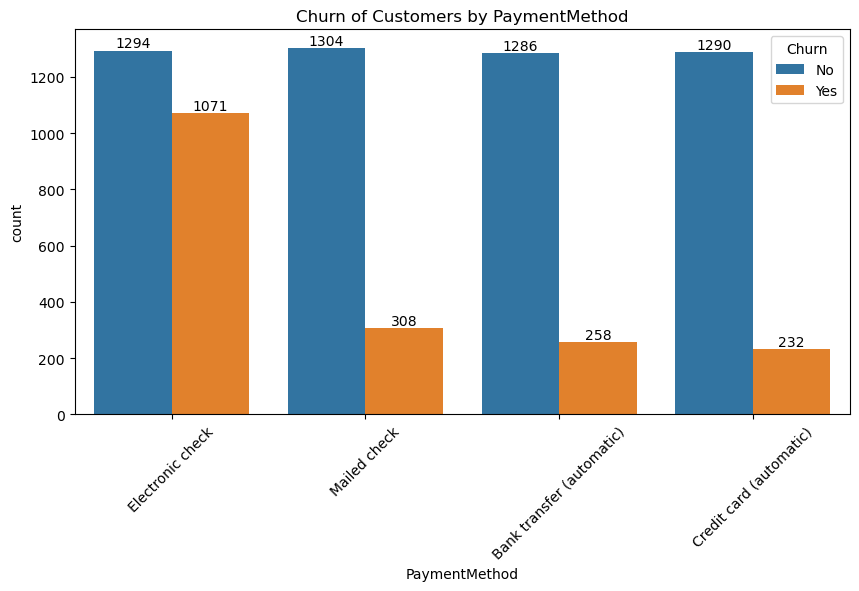

In [88]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x ="PaymentMethod", data=df,hue ="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn of Customers by PaymentMethod")
plt.xticks(rotation=45)
plt.show()